# LAB 1 MOS: Modelado Matematico y Fundamentos en Pyomo

- Samuel Augusto Hernandez 202213772
- Tomas Alberto Rodriguez 2022128686

## Problema 1:

### Parte A:
#### Indentificacion del problema:
El scrum master busca ´maximizar´ la cantidad de tareas segun la prioridad que un grupo de 4 desarrolladores pueden realizar por sprint sin sobrepasar un total de 52 puntos y teniendo en cuenta que cada tarea tiene puntos determinados distintos.
#### Suposiciones:
- La suma de los puntos de historia de las tareas a hacer supera siempre los 52 puntos, es decir, no se podran escoger todas las tareas.
- Los desarrolladores trabajarn siempre en condiciones normales, es decir, sin fatiga u otros factores humanos.
- Ninguna tarea supera los 52 puntos por si sola.
- No ocurrira que todas las tareas tenga la misma prioridad.
- La prioridad se asignara con la sucesion de fibonacci, el nivel mas bajo, va a ser 1, y el mas alto corresponde a 21.
#### Variables Claves
- Puntos Historia asignados a cada tarea
- Prioridad asignada a cada tarea
- Variable de decision si se toma o no la tarea
#### Parametros
- Prioridad asignada a cada tarea
#### Relaciones
Las relaciones entre las Variables y los Parametros es de maximizacion de la suma del producto de las prioridades y la variable de desicion.
#### Tipo de Modelo
Es un modelo de organizacion de naturaleza lineal mixta. (MIP)

### Representacion Matematica
#### Set de Tareas
$$ T = \{T_1,T_2,T_3,T_4,T_5,...,T_N\}$$
#### Indices
$$ \forall i \in T$$
#### Parametros
$$ \forall prioridad_i \in T$$
#### Variable de desicion 
$$ x_i \in \{0,1\}$$
#### Relaciones de las Variables y Parametros
##### Funcion Objetivo
$$ MAX(\sum_{i\in T} x_i \cdot prioridad_i)$$
##### Restricciones
$$ \sum_{i\in T} x_i \cdot puntosH_i \leq 52$$

### Parte B
En este caso, el modelo sera casi igual, lo unico que cambiara sera que ahora se presentara un modelo no para un equipo si para cada desarrollador y esto se logra alterando las restricciones del problema en el apartado de las 'Relaciones'.

### Representacion Matematica
#### Set de Tareas
$$ T = \{T_1,T_2,T_3,T_4,T_5,...,T_N\}$$

$$ D = \{D_1,D_2,D_3,...,D_N\}$$
#### Indices
$$ \forall i \in T$$

$$\forall j \in D$$
#### Parametros
$$ \forall prioridad_i \in T$$
#### Varaible de desicion 
$$ x_{ij}\in \{0,1\}$$
#### Relaciones de las Variables y Parametros
##### Funcion Objetivo
$$ MAX(\sum_{i\in T} \sum_{j\in D} x_{ij} \cdot prioridad_i)$$
##### Restricciones
$$ \sum_{i\in T} x_{ij} \cdot puntosH_i \leq 13 \ \forall j \in D$$

$$ \sum_{j\in D} x_{ij} \leq 1 \ \forall i \in T$$


En este caso, se tendria la consideracion adicional que el modelo se corre por cada desarrollador, es decir, si hay 4 desarrolladores, el modelo se corre 4 veces.

### Parte C (Codigo)

In [32]:
from pyomo.environ import *
tareas = {
    'T1': {'prioridad': 21, 'puntosH': 5},   # Máxima
    'T2': {'prioridad': 8, 'puntosH': 3},    # Media alta
    'T3': {'prioridad': 13, 'puntosH': 13},  # Alta
    'T4': {'prioridad': 3, 'puntosH': 1},    # Media baja
    'T5': {'prioridad': 1, 'puntosH': 21},   # Mínima
    'T6': {'prioridad': 5, 'puntosH': 2},    # Media
    'T7': {'prioridad': 13, 'puntosH': 2},   # Alta
    'T8': {'prioridad': 13, 'puntosH': 5},   # Alta
    'T9': {'prioridad': 2, 'puntosH': 8},    # Baja
    'T10': {'prioridad': 21, 'puntosH': 13}, # Máxima
    'T11': {'prioridad': 13, 'puntosH': 21}  # Alta
}


model_A = ConcreteModel()
model_A.T = Set(initialize=tareas.keys())
model_A.x = Var(model_A.T, domain=Binary)

model_A.obj = Objective(expr=sum(model_A.x[i] * tareas[i]['prioridad'] for i in model_A.T), sense=maximize)

model_A.restriccion_puntos = Constraint(expr=sum(model_A.x[i] * tareas[i]['puntosH'] for i in model_A.T) <= 52)

solver = SolverFactory('glpk')
solver.solve(model_A)

print("\nResultados - Parte A (Equipo Completo):")
for i in model_A.T:
    if model_A.x[i].value == 1:
        print(f"Tarea {i} seleccionada")

model_A.display()



Resultados - Parte A (Equipo Completo):
Tarea T1 seleccionada
Tarea T2 seleccionada
Tarea T3 seleccionada
Tarea T4 seleccionada
Tarea T6 seleccionada
Tarea T7 seleccionada
Tarea T8 seleccionada
Tarea T9 seleccionada
Tarea T10 seleccionada
Model unknown

  Variables:
    x : Size=11, Index=T
        Key : Lower : Value : Upper : Fixed : Stale : Domain
         T1 :     0 :   1.0 :     1 : False : False : Binary
        T10 :     0 :   1.0 :     1 : False : False : Binary
        T11 :     0 :   0.0 :     1 : False : False : Binary
         T2 :     0 :   1.0 :     1 : False : False : Binary
         T3 :     0 :   1.0 :     1 : False : False : Binary
         T4 :     0 :   1.0 :     1 : False : False : Binary
         T5 :     0 :   0.0 :     1 : False : False : Binary
         T6 :     0 :   1.0 :     1 : False : False : Binary
         T7 :     0 :   1.0 :     1 : False : False : Binary
         T8 :     0 :   1.0 :     1 : False : False : Binary
         T9 :     0 :   1.0 :     1 

In [33]:
desarrolladores = ['D1', 'D2', 'D3', 'D4']
model_B = ConcreteModel()
model_B.T = Set(initialize=tareas.keys())
model_B.D = Set(initialize=desarrolladores)
model_B.x = Var(model_B.T, model_B.D, within=Binary)

model_B.obj = Objective(expr=sum(model_B.x[i, j] * tareas[i]['prioridad'] for i in model_B.T for j in model_B.D), sense=maximize)

model_B.restriccion_puntos = ConstraintList()
for j in model_B.D:
    model_B.restriccion_puntos.add(sum(model_B.x[i, j] * tareas[i]['puntosH'] for i in model_B.T) <= 13)

model_B.restriccion_unico = ConstraintList()
for i in model_B.T:
    model_B.restriccion_unico.add(sum(model_B.x[i, j] for j in model_B.D) <= 1)

solver.solve(model_B)


print("\nResultados - Parte B (Por Desarrollador):")
for j in model_B.D:
    print(f"\nDesarrollador {j}:")
    for i in model_B.T:
        if model_B.x[i, j].value == 1:
            print(f"  - Tarea {i}")
model_B.display()


Resultados - Parte B (Por Desarrollador):

Desarrollador D1:
  - Tarea T1
  - Tarea T2
  - Tarea T8

Desarrollador D2:
  - Tarea T10

Desarrollador D3:
  - Tarea T3

Desarrollador D4:
  - Tarea T4
  - Tarea T6
  - Tarea T7
  - Tarea T9
Model unknown

  Variables:
    x : Size=44, Index=T*D
        Key           : Lower : Value : Upper : Fixed : Stale : Domain
         ('T1', 'D1') :     0 :   1.0 :     1 : False : False : Binary
         ('T1', 'D2') :     0 :   0.0 :     1 : False : False : Binary
         ('T1', 'D3') :     0 :   0.0 :     1 : False : False : Binary
         ('T1', 'D4') :     0 :   0.0 :     1 : False : False : Binary
        ('T10', 'D1') :     0 :   0.0 :     1 : False : False : Binary
        ('T10', 'D2') :     0 :   1.0 :     1 : False : False : Binary
        ('T10', 'D3') :     0 :   0.0 :     1 : False : False : Binary
        ('T10', 'D4') :     0 :   0.0 :     1 : False : False : Binary
        ('T11', 'D1') :     0 :   0.0 :     1 : False : False : Binar

Tareas seleccionadas en la Parte A: {'T1': 5, 'T2': 3, 'T3': 13, 'T4': 1, 'T6': 2, 'T7': 2, 'T8': 5, 'T9': 8, 'T10': 13}


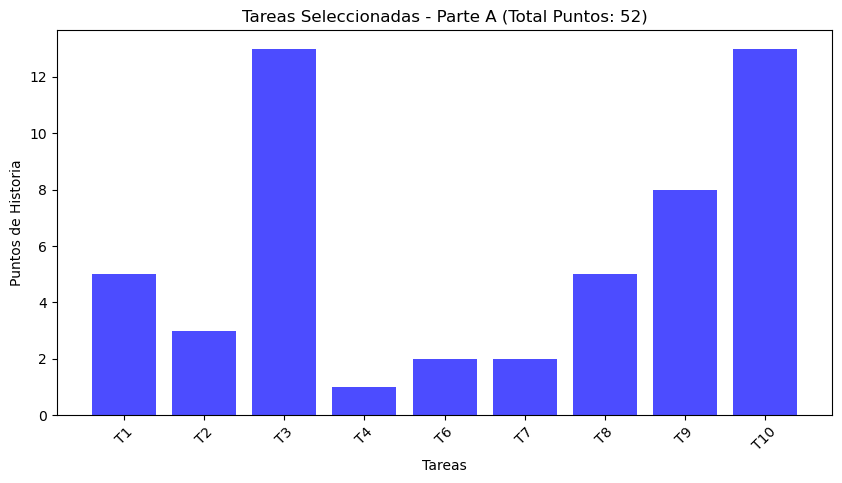

In [34]:
import matplotlib.pyplot as plt
import numpy as np

tareas_seleccionadas_A = {
    i: tareas[i]['puntosH'] for i in model_A.T if model_A.x[i].value == 1
}
print("Tareas seleccionadas en la Parte A:", tareas_seleccionadas_A)

total_puntos_A = sum(tareas_seleccionadas_A.values())

plt.figure(figsize=(10, 5))
plt.bar(tareas_seleccionadas_A.keys(), tareas_seleccionadas_A.values(), color='blue', alpha=0.7)
plt.xlabel("Tareas")
plt.ylabel("Puntos de Historia")
plt.title(f"Tareas Seleccionadas - Parte A (Total Puntos: {total_puntos_A})")
plt.xticks(rotation=45)
plt.show()


Tareas asignadas en la Parte B: {'D1': {'T1': 5, 'T2': 3, 'T8': 5}, 'D2': {'T10': 13}, 'D3': {'T3': 13}, 'D4': {'T4': 1, 'T6': 2, 'T7': 2, 'T9': 8}}


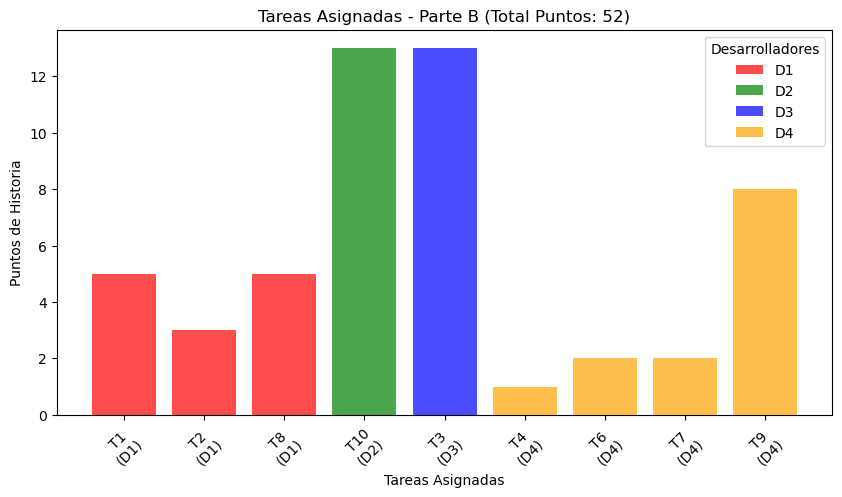

In [35]:
tareas_seleccionadas_B = {j: {} for j in model_B.D}

for i in model_B.T:
    for j in model_B.D:
        if model_B.x[i, j].value == 1:
            tareas_seleccionadas_B[j][i] = tareas[i]['puntosH']

print("Tareas asignadas en la Parte B:", tareas_seleccionadas_B)


total_puntos_B = sum(sum(tareas.values()) for tareas in tareas_seleccionadas_B.values())

# Gráfico de la Parte B
plt.figure(figsize=(10, 5))
desarrolladores = list(tareas_seleccionadas_B.keys())
bar_width = 0.2
index = np.arange(len(desarrolladores))

colors = ['red', 'green', 'blue', 'orange']

for i, (dev, tareas) in enumerate(tareas_seleccionadas_B.items()):
    plt.bar(
        [f"{tarea}\n({dev})" for tarea in tareas.keys()], tareas.values(),
        color=colors[i], alpha=0.7, label=dev
    )

plt.xlabel("Tareas Asignadas")
plt.ylabel("Puntos de Historia")
plt.title(f"Tareas Asignadas - Parte B (Total Puntos: {total_puntos_B})")
plt.legend(title="Desarrolladores")
plt.xticks(rotation=45)
plt.show()




## Problema 2

# Problema 2: Asignacion de trabajos a trabajadores

## Parte A

### Problema

Se tiene un conjunto de trabajos que deben ser asignados a un grupo de trabajadores. Cada trabajo requiere un tiempo específico para completarse y genera una ganancia fija al finalizarse. Cada trabajador tiene una disponibilidad limitada de horas. El objetivo es maximizar la ganancia total obtenida por los trabajos asignados, sin que ningún trabajador exceda su disponibilidad horaria

### Suposiciones

- Los trabajos son independientes entre si.
- Cada trabajo puede ser asignado a lo sumo a un trabajador (no se permite que un mismo trabajo sea realizado por varios trabajadores).
- Un trabajo debe ser realizado por completo por el trabajador. No se hacen fracciones de trabajo.
- El tiempo requerido para cada trabajo es fijo y no depende el trabajador.

**Conjuntos:** Trabajo y empleados
$$E = \{E_1, E_2, E_3\}$$
$$T = \{T_1, T_2, \dots, T_5\}$$

### Parametros

- Horas de cada tarea : $$H_t, \quad \forall t \in T$$
- Ganacias de cada tarea : $$G_t, \quad \forall t \in T$$
- Disponibildad de cada empleado : $$D_e, \quad \forall e \in E$$

### Variables clave
Variable de decision binaria: $$X(t,e)$$
Donde indica si ese trabajador hace esa tarea con valores de 1 y 0


### Relaciones

**Función Objetivo:**
$$\text{Maximizar} \sum_{e \in E} \sum_{t \in T} G_t \times X_(t,e)$$
**Restricciones:**
$$\sum_{t \in T} H_t \times X_(t,e) \leq D_e \quad \forall e \in E $$
Restriccion de disponibilidad de empleado

$$\sum_{e \in E} X_(t,e) \leq 1 \quad \forall t \in T $$
Restriccion de asignacion unica de tarea (cada tarea solo se puede asignar una vez)


### Tipo de modelo: MIP

## Parte B
**Conjuntos:** Trabajo y empleados
$$E = \{E_1, E_2, E_3\}$$
$$T = \{T_1, T_2, \dots, T_5\}$$

### Parametros

- Horas de cada tarea : $$H_t, \quad \forall t \in T$$
- Ganacias de cada tarea : $$G_t, \quad \forall t \in T$$
- Disponibildad de cada empleado : $$D_e, \quad \forall e \in E$$

### Variables clave
Variable de decision binaria: $$X(t,e)$$
Donde indica si ese trabajador hace esa tarea con valores de 1 y 0


### Relaciones

**Función Objetivo:**
$$\text{Maximizar} \sum_{e \in E} \sum_{t \in T} G_t \times X_(t,e)$$
**Restricciones:**
$$\sum_{t \in T} H_t \times X_(t,e) \leq D_e \quad \forall e \in E $$
Restriccion de disponibilidad de empleado

$$\sum_{e \in E} X_(t,e) \leq 1 \quad \forall t \in T $$
Restriccion de asignacion unica de tarea (cada tarea solo se puede asignar una vez)

- Solo el trabajador 1 puede realizar el Trabajo 1 
- El Trabajo 3 no puede ser realizado por el trabajador 2
 
Esto hace que al modelo de la parte A se agreguen las siguientes restricciones

$$X_(1,1) \text{ = 1, }$$

$$X_(1,2) \text{ = 0, }$$

$$X_(1,3) \text{ = 0 } $$

$$ X_(3,2) \text{ = 0 } $$

### Parte C (Codigo)

In [36]:
trabajos = {
    'T1': {'ganancia': 50, 'tiempo': 4}, 
    'T2': {'ganancia': 60, 'tiempo': 5},  
    'T3': {'ganancia': 40, 'tiempo': 3}, 
    'T4': {'ganancia': 70, 'tiempo': 6},    
    'T5': {'ganancia': 30, 'tiempo': 2}
}
empleados = {
    'E1': {'disponibilidad': 8}, 
    'E2': {'disponibilidad': 10},  
    'E3': {'disponibilidad': 6}
}

model_2 = ConcreteModel()
model_2.T = Set(initialize=trabajos.keys())
model_2.E = Set(initialize=empleados.keys())
model_2.x = Var(model_2.T,model_2.E, domain=Binary)

model_2.obj = Objective(expr=sum(model_2.x[i, j] * trabajos[i]['ganancia'] for i in model_2.T for j in model_2.E), sense=maximize)

model_2.restriccion_disponibilidad = ConstraintList()
for j in model_2.E:
    model_2.restriccion_disponibilidad.add(sum(model_2.x[i, j] * trabajos[i]['tiempo'] for i in model_2.T) <= empleados[j]["disponibilidad"])

model_2.restriccion_unico = ConstraintList()
for i in model_2.T:
    model_2.restriccion_unico.add(sum(model_2.x[i, j] for j in model_2.E) <= 1)


solver = SolverFactory('glpk')
solver.solve(model_2)
total_ganancia = 0
print("\nResultados - Parte A:")
for t in model_2.T:
    for e in model_2.E:
        if model_2.x[t, e].value == 1:
            print(f"Trabajo {t} asignado al trabajador {e}")
            total_ganancia = trabajos[t]['ganancia']
print(f"Ganancia total: {total_ganancia}")
model_2.display()


Resultados - Parte A:
Trabajo T1 asignado al trabajador E1
Trabajo T2 asignado al trabajador E2
Trabajo T3 asignado al trabajador E2
Trabajo T4 asignado al trabajador E3
Trabajo T5 asignado al trabajador E1
Ganancia total: 30
Model unknown

  Variables:
    x : Size=15, Index=T*E
        Key          : Lower : Value : Upper : Fixed : Stale : Domain
        ('T1', 'E1') :     0 :   1.0 :     1 : False : False : Binary
        ('T1', 'E2') :     0 :   0.0 :     1 : False : False : Binary
        ('T1', 'E3') :     0 :   0.0 :     1 : False : False : Binary
        ('T2', 'E1') :     0 :   0.0 :     1 : False : False : Binary
        ('T2', 'E2') :     0 :   1.0 :     1 : False : False : Binary
        ('T2', 'E3') :     0 :   0.0 :     1 : False : False : Binary
        ('T3', 'E1') :     0 :   0.0 :     1 : False : False : Binary
        ('T3', 'E2') :     0 :   1.0 :     1 : False : False : Binary
        ('T3', 'E3') :     0 :   0.0 :     1 : False : False : Binary
        ('T4', 'E1

In [37]:
model_2B = ConcreteModel()
model_2B.T = Set(initialize=trabajos.keys())
model_2B.E = Set(initialize=empleados.keys())
model_2B.x = Var(model_2B.T,model_2B.E, domain=Binary)

model_2B.obj = Objective(expr=sum(model_2B.x[i, j] * trabajos[i]['ganancia'] for i in model_2B.T for j in model_2B.E), sense=maximize)

model_2B.restriccion_disponibilidad = ConstraintList()
for j in model_2B.E:
    model_2B.restriccion_disponibilidad.add(sum(model_2B.x[i, j] * trabajos[i]['tiempo'] for i in model_2.T) <= empleados[j]["disponibilidad"])

model_2B.restriccion_unico = ConstraintList()
for i in model_2B.T:
    model_2B.restriccion_unico.add(sum(model_2B.x[i, j] for j in model_2B.E) <= 1)

model_2B.restriccion_trabajo_1 = Constraint(expr=model_2B.x['T1', 'E1'] == 1)  # Solo el trabajador 1 puede hacer el trabajo 1
model_2B.restriccion_trabajo_3 = Constraint(expr=model_2B.x['T3', 'E2'] == 0)  # El trabajo 3 no puede ser hecho por el trabajador 2


solver = SolverFactory('glpk')
solver.solve(model_2B)
total_ganancia = 0
print("\nResultados - Parte B:")
for t in model_2B.T:
    for e in model_2B.E:
            if model_2B.x[t, e].value == 1:
                print(f"Trabajo {t} asignado al trabajador {e}")
                total_ganancia = trabajos[t]['ganancia']

print(f"Ganancia total: {total_ganancia}")
model_2B.display()


Resultados - Parte B:
Trabajo T1 asignado al trabajador E1
Trabajo T2 asignado al trabajador E2
Trabajo T3 asignado al trabajador E1
Trabajo T4 asignado al trabajador E3
Trabajo T5 asignado al trabajador E2
Ganancia total: 30
Model unknown

  Variables:
    x : Size=15, Index=T*E
        Key          : Lower : Value : Upper : Fixed : Stale : Domain
        ('T1', 'E1') :     0 :   1.0 :     1 : False : False : Binary
        ('T1', 'E2') :     0 :   0.0 :     1 : False : False : Binary
        ('T1', 'E3') :     0 :   0.0 :     1 : False : False : Binary
        ('T2', 'E1') :     0 :   0.0 :     1 : False : False : Binary
        ('T2', 'E2') :     0 :   1.0 :     1 : False : False : Binary
        ('T2', 'E3') :     0 :   0.0 :     1 : False : False : Binary
        ('T3', 'E1') :     0 :   1.0 :     1 : False : False : Binary
        ('T3', 'E2') :     0 :   0.0 :     1 : False : False : Binary
        ('T3', 'E3') :     0 :   0.0 :     1 : False : False : Binary
        ('T4', 'E1

Resultados de la Parte A (Trabajo Asignado y Tiempo Utilizado):
Trabajador E1 tiene los trabajos {'T1': 4, 'T5': 2} y ha utilizado 6 horas
Trabajador E2 tiene los trabajos {'T2': 5, 'T3': 3} y ha utilizado 8 horas
Trabajador E3 tiene los trabajos {'T4': 6} y ha utilizado 6 horas
Se repartieron en total 20 horas


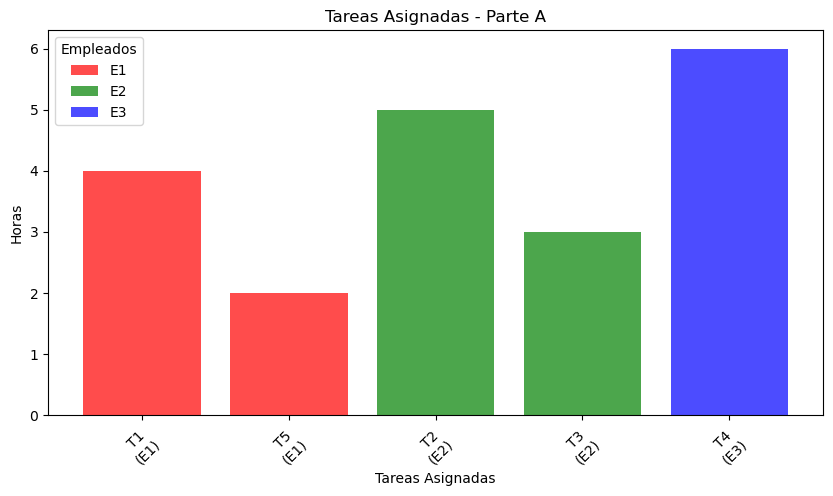

In [38]:
tareas_seleccionadas_A = {j: {} for j in model_2.E}
tiempo_total = {e: 0 for e in model_2.E}

for i in model_2.T:
    for j in model_2.E:
        if model_2.x[i, j].value == 1:
            tareas_seleccionadas_A[j][i] = trabajos[i]['tiempo']
            tiempo_total[j] += trabajos[i]['tiempo']

print("Resultados de la Parte A (Trabajo Asignado y Tiempo Utilizado):")
for e in model_2.E:
    print(f"Trabajador {e} tiene los trabajos {tareas_seleccionadas_A[e]} y ha utilizado {tiempo_total[e]} horas")


total_horas_A = sum(sum(trabajos.values()) for trabajos in tareas_seleccionadas_A.values())
print(f"Se repartieron en total {total_horas_A} horas")

# Gráfico de la Parte B
plt.figure(figsize=(10, 5))
emp = list(tareas_seleccionadas_A.keys())
bar_width = 0.2
index = np.arange(len(emp))

colors = ['red', 'green', 'blue']

for i, (dev, tareas) in enumerate(tareas_seleccionadas_A.items()):
    plt.bar(
        [f"{tarea}\n({dev})" for tarea in tareas.keys()], tareas.values(),
        color=colors[i], alpha=0.7, label=dev
    )

plt.xlabel("Tareas Asignadas")
plt.ylabel("Horas")
plt.title(f"Tareas Asignadas - Parte A")
plt.legend(title="Empleados")
plt.xticks(rotation=45)
plt.show()


Resultados de la Parte B (Trabajo Asignado y Tiempo Utilizado):
Trabajador E1 tiene los trabajos {'T1': 4, 'T3': 3} y ha utilizado 7 horas
Trabajador E2 tiene los trabajos {'T2': 5, 'T5': 2} y ha utilizado 7 horas
Trabajador E3 tiene los trabajos {'T4': 6} y ha utilizado 6 horas
Se repartieron en total 20 horas


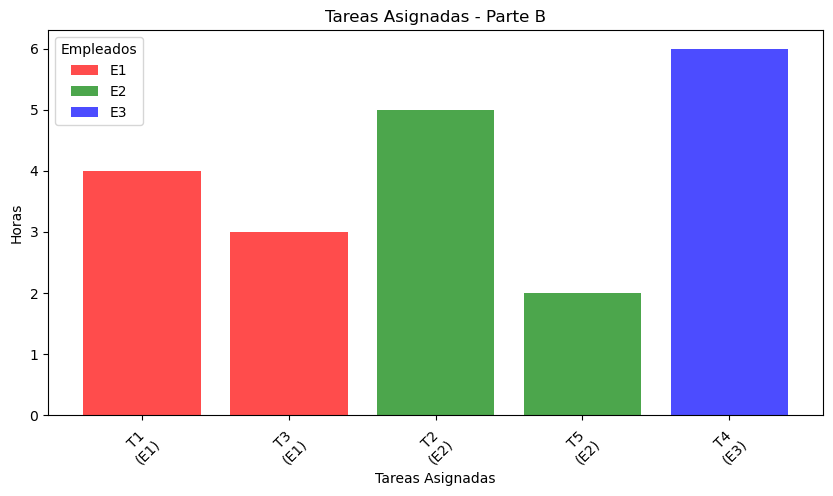

In [39]:
tareas_seleccionadas_B = {j: {} for j in model_2B.E}
tiempo_total = {e: 0 for e in model_2B.E}

for i in model_2B.T:
    for j in model_2B.E:
        if model_2B.x[i, j].value == 1:
            tareas_seleccionadas_B[j][i] = trabajos[i]['tiempo']
            tiempo_total[j] += trabajos[i]['tiempo']

print("Resultados de la Parte B (Trabajo Asignado y Tiempo Utilizado):")
for e in model_2B.E:
    print(f"Trabajador {e} tiene los trabajos {tareas_seleccionadas_B[e]} y ha utilizado {tiempo_total[e]} horas")


total_horas_B = sum(sum(trabajos.values()) for trabajos in tareas_seleccionadas_B.values())
print(f"Se repartieron en total {total_horas_B} horas")

# Gráfico de la Parte B
plt.figure(figsize=(10, 5))
emp = list(tareas_seleccionadas_B.keys())
bar_width = 0.2
index = np.arange(len(emp))

colors = ['red', 'green', 'blue']

for i, (dev, tareas) in enumerate(tareas_seleccionadas_B.items()):
    plt.bar(
        [f"{tarea}\n({dev})" for tarea in tareas.keys()], tareas.values(),
        color=colors[i], alpha=0.7, label=dev
    )

plt.xlabel("Tareas Asignadas")
plt.ylabel("Horas")
plt.title(f"Tareas Asignadas - Parte B")
plt.legend(title="Empleados")
plt.xticks(rotation=45)
plt.show()

### Solucion de A:

Resultados de la Parte A (Trabajo Asignado y Tiempo Utilizado):

Trabajador E1 tiene los trabajos {'T1': 4, 'T5': 2} y ha utilizado 6 horas

Trabajador E2 tiene los trabajos {'T2': 5, 'T3': 3} y ha utilizado 8 horas

Trabajador E3 tiene los trabajos {'T4': 6} y ha utilizado 6 horas

### Solucion de B:

Resultados de la Parte B (Trabajo Asignado y Tiempo Utilizado):

Trabajador E1 tiene los trabajos {'T1': 4, 'T3': 3} y ha utilizado 7 horas

Trabajador E2 tiene los trabajos {'T2': 5, 'T5': 2} y ha utilizado 7 horas

Trabajador E3 tiene los trabajos {'T4': 6} y ha utilizado 6 horas

## Problema 3

### Parte A:
#### Indentificacion del problema:
Se quiere 'maximizar' el valor de los recursos enviados en los 3 aviones, teniendo en cuenta que cada avion tiene restricciones de peso, volumen y algunas restricciones especiales entre recursos.
#### Suposiciones:
- No se pueden dividir los recursos entre aviones
- El peso y volumen de los recursos no varia entre aviones 
- Cada avion puede llevar mas de un recurso, excepto la combinacion de equipos medicos y agua
- Los Recursos van a tomar un indice de 1 a 5 en orden
#### Variables Claves
- Peso en toneladas
- Valor del recurso
- Volumen en $m^3$
- Variable desicion
#### Parametros
- Valor del recurso
#### Relaciones
Las relaciones entre las Variables y los Parametros es de maximizacion de la suma del producto de los valores y la variable de desicion.
#### Tipo de Modelo
Es un modelo de organizacion de naturaleza lineal mixta. (MIP)

### Representacion Matematica
#### Set de Tareas
$$ R = \{R_1,R_2,R_3,R_4,R_5\}$$
$$ A = \{A_1,A_2,A_3\}$$
#### Indices
$$ \forall i \in R$$
$$ \forall j \in A$$
#### Parametros
$$ \forall valor_i \in R$$
#### Variable de desicion 
$$ x_{ij} \in \{0,1\}$$
#### Relaciones de las Variables y Parametros
##### Funcion Objetivo
$$ MAX(\sum_{i\in R} \sum_{j\in A} x_{ij} \cdot valor_i)$$
##### Restricciones
$$ \sum_{i\in R} x_{ij} \cdot Peso_i \leq Peso_j \ \forall j \in A$$
$$ \sum_{i\in R} x_{ij} \cdot Volumen_i \leq Volumen_j \ \forall j \in A$$
$$ \sum_{j \in A} x_{ij} \leq 1 \ \forall i \in R$$

- Seguridad Medicamentos

$$ x_{21} = 0$$

- Compatibilidad equipos medicos y agua

$$ j_1 / x_{3j_1} = 1 \wedge j_2 /  x_{4j_2} = 1 \rightarrow j_1 \neq j_2$$




In [40]:
recursos = ['R1', 'R2', 'R3', 'R4', 'R5'] 
aviones = ['A1', 'A2', 'A3']  

datos_recursos = {
    'R1': {'valor': 50, 'peso': 15, 'volumen': 8},
    'R2': {'valor': 100, 'peso': 5, 'volumen': 2}, # Medicinas
    'R3': {'valor': 120, 'peso': 20, 'volumen': 10},  # Equipos médicos
    'R4': {'valor': 60, 'peso': 18, 'volumen': 12},  # Agua
    'R5': {'valor': 40, 'peso': 10, 'volumen': 6},
}

limites_aviones = {
    'A1': {'peso_max': 30, 'volumen_max': 25},
    'A2': {'peso_max': 42, 'volumen_max': 30},
    'A3': {'peso_max': 50, 'volumen_max': 35},
}

model = ConcreteModel()
model.R = Set(initialize=recursos)
model.A = Set(initialize=aviones)
model.x = Var(model.R, model.A, domain=Binary) 

model.obj = Objective(
    expr=sum(model.x[i, j] * datos_recursos[i]['valor'] for i in model.R for j in model.A),
    sense=maximize
)

model.restriccion_peso = ConstraintList()
for j in model.A:
    model.restriccion_peso.add(
        sum(model.x[i, j] * datos_recursos[i]['peso'] for i in model.R) <= limites_aviones[j]['peso_max']
    )

model.restriccion_volumen = ConstraintList()
for j in model.A:
    model.restriccion_volumen.add(
        sum(model.x[i, j] * datos_recursos[i]['volumen'] for i in model.R) <= limites_aviones[j]['volumen_max']
    )

model.restriccion_asignacion = ConstraintList()
for i in model.R:
    model.restriccion_asignacion.add(
        sum(model.x[i, j] for j in model.A) <= 1
    )

model.restriccion_seguridad = Constraint(expr=model.x['R2', 'A1'] == 0)

model.restriccion_compatibilidad = ConstraintList()
for j in model.A:
    model.restriccion_compatibilidad.add(model.x['R3', j] + model.x['R4', j] <= 1)

solver.solve(model)

asignacion_aviones = {j: {'Recursos': [], 'Peso Usado': 0, 'Volumen Usado': 0} for j in model.A}

for i in model.R:
    for j in model.A:
        if model.x[i, j].value == 1:
            asignacion_aviones[j]['Recursos'].append(i)
            asignacion_aviones[j]['Peso Usado'] += datos_recursos[i]['peso']
            asignacion_aviones[j]['Volumen Usado'] += datos_recursos[i]['volumen']

print("\nAsignación de Recursos por Avión:")
for avion, datos in asignacion_aviones.items():
    print(f"Avión {avion}:")
    print(f"  - Recursos asignados: {datos['Recursos']}")
    print(f"  - Peso utilizado: {datos['Peso Usado']} toneladas")
    print(f"  - Volumen utilizado: {datos['Volumen Usado']} m³")


print(f"\nValor total transportado: {model.obj()} USD")

model.display()


Asignación de Recursos por Avión:
Avión A1:
  - Recursos asignados: ['R1']
  - Peso utilizado: 15 toneladas
  - Volumen utilizado: 8 m³
Avión A2:
  - Recursos asignados: ['R2', 'R4', 'R5']
  - Peso utilizado: 33 toneladas
  - Volumen utilizado: 20 m³
Avión A3:
  - Recursos asignados: ['R3']
  - Peso utilizado: 20 toneladas
  - Volumen utilizado: 10 m³

Valor total transportado: 370.0 USD
Model unknown

  Variables:
    x : Size=15, Index=R*A
        Key          : Lower : Value : Upper : Fixed : Stale : Domain
        ('R1', 'A1') :     0 :   1.0 :     1 : False : False : Binary
        ('R1', 'A2') :     0 :   0.0 :     1 : False : False : Binary
        ('R1', 'A3') :     0 :   0.0 :     1 : False : False : Binary
        ('R2', 'A1') :     0 :   0.0 :     1 : False : False : Binary
        ('R2', 'A2') :     0 :   1.0 :     1 : False : False : Binary
        ('R2', 'A3') :     0 :   0.0 :     1 : False : False : Binary
        ('R3', 'A1') :     0 :   0.0 :     1 : False : False : 